### Read Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
fish = pd.read_csv('fish_data.csv')

In [3]:
fish.head(10)

,species,length,weight,w_l_ratio
0,Anabas testudineus,10.66,3.45,0.32
1,Anabas testudineus,6.91,3.27,0.47
2,Anabas testudineus,8.38,3.46,0.41
3,Anabas testudineus,7.57,3.36,0.44
4,Anabas testudineus,10.83,3.38,0.31
5,Anabas testudineus,9.35,3.28,0.35
6,Anabas testudineus,9.42,3.33,0.35
7,Anabas testudineus,7.92,3.13,0.39
8,Anabas testudineus,6.98,3.16,0.45
9,Anabas testudineus,8.42,3.26,0.39


In [4]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4080 entries, 0 to 4079
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   species    4080 non-null   object 
 1   length     4080 non-null   float64
 2   weight     4080 non-null   float64
 3   w_l_ratio  4080 non-null   float64
dtypes: float64(3), object(1)
memory usage: 127.6+ KB


In [5]:
fish.describe()

,length,weight,w_l_ratio
count,4080.000000,4080.000000,4080.000000
mean,17.353544,3.739875,0.252782
std,7.114684,1.040365,0.123046
min,6.360000,2.050000,0.080000
25%,11.327500,3.070000,0.170000
50%,17.350000,3.310000,0.190000
75%,22.585000,4.100000,0.340000
max,33.860000,6.290000,0.640000


<Axes: ylabel='count'>

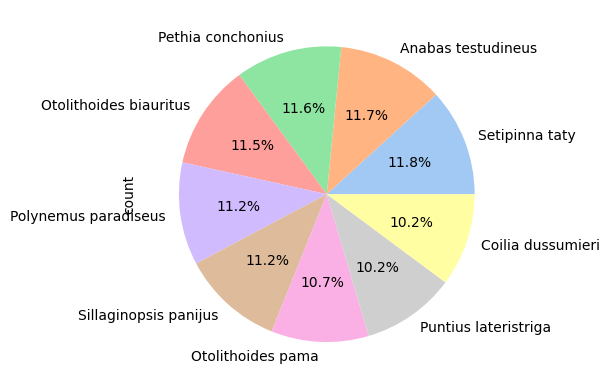

In [6]:
sns.set_palette('pastel')
fish['species'].value_counts().plot(kind='pie', autopct='%1.1f%%')

### split data dan scale

In [7]:
x = fish.iloc[:,1:].values
y = fish.iloc[:,[0]].values
y = y.reshape(len(y),)

In [8]:

scaler = StandardScaler()
x = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

### Modeling dan Eval

In [9]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [10]:
y_pred = model.predict(x_test)
print("Akurasi Model = ", accuracy_score(y_pred,y_test))
print("Clasifikasi   = \n",classification_report(y_pred,y_test))
print("Confusion     = \n", confusion_matrix(y_test, y_pred))

Akurasi Model =  0.9276960784313726
Clasifikasi   = 
                         precision    recall  f1-score   support

    Anabas testudineus       1.00      1.00      1.00        97
     Coilia dussumieri       1.00      1.00      1.00        96
Otolithoides biauritus       0.70      0.71      0.70        99
     Otolithoides pama       1.00      1.00      1.00        85
     Pethia conchonius       1.00      1.00      1.00        84
  Polynemus paradiseus       1.00      1.00      1.00        85
  Puntius lateristriga       1.00      1.00      1.00        74
        Setipinna taty       0.72      0.71      0.71       104
 Sillaginopsis panijus       1.00      1.00      1.00        92

              accuracy                           0.93       816
             macro avg       0.94      0.94      0.94       816
          weighted avg       0.93      0.93      0.93       816

Confusion     = 
 [[97  0  0  0  0  0  0  0  0]
 [ 0 96  0  0  0  0  0  0  0]
 [ 0  0 70  0  0  0  0 30  0]
 [ 

### Testis New Data

In [11]:
new_data = [[10.83,3.38,0.31]]
scaled_data = scaler.transform(new_data)
new_pred = model.predict(scaled_data)
print(new_pred)

['Anabas testudineus']


### Import Model

In [12]:
import pickle

# Export model
with open('random_forest.pkl', 'wb') as file:
    pickle.dump(model, file)

# Export scaler
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

print("Model dan scaler berhasil disimpan!")

Model dan scaler berhasil disimpan!
